In [ ]:
# -*- coding: utf-8 -*-
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or
# implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

# EDA for the first time

### Literatúry
- [Pandas documentation](https://pandas.pydata.org/docs/)
- [Pandas tutorials](https://pandas.pydata.org/pandas-docs/version/0.15/tutorials.html)
- https://github.com/FIIT-IAU
- https://github.com/FIIT-IAU/IAU-2019-2020

### Dnes sa budeme venovať tomu, ako...
- načítať dáta
- analyzovať jednotlivé atribúty
- analyzovať vzťahy medzi atribútmi
- vizualizovať dáta (vhodné typy vizualizácií, vlastnosti dobrých vizualizácií, ako neklamať vizualizáciou)

### Predtým, ako začneme analyzovať dáta, by sme si mali ujasniť...
- Aké otázky máme analýzou zodpovedať
- Akú úlohu máme riešiť

# Country dataset - Reading from a file using Pandas

In [1]:
import matplotlib
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
filename = "data/countries.csv"
df = pd.read_csv(filename)
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


**Reading the file again with the proper `decimal` for numbers for this file**

In [3]:
df = pd.read_csv(filename, decimal=',')
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [5]:
df.Region.unique()

array(['ASIA (EX. NEAR EAST)         ',
       'EASTERN EUROPE                     ',
       'NORTHERN AFRICA                    ',
       'OCEANIA                            ',
       'WESTERN EUROPE                     ',
       'SUB-SAHARAN AFRICA                 ', 'LATIN AMER. & CARIB    ',
       'C.W. OF IND. STATES ', 'NEAR EAST                          ',
       'NORTHERN AMERICA                   ',
       'BALTICS                            '], dtype=object)

**String cleaning - remove blank spaces**

In [6]:
df.Region = df.Region.str.strip()
df.Country = df.Country.str.strip()
df.Region.unique()

array(['ASIA (EX. NEAR EAST)', 'EASTERN EUROPE', 'NORTHERN AFRICA',
       'OCEANIA', 'WESTERN EUROPE', 'SUB-SAHARAN AFRICA',
       'LATIN AMER. & CARIB', 'C.W. OF IND. STATES', 'NEAR EAST',
       'NORTHERN AMERICA', 'BALTICS'], dtype=object)

## Missing value?
**In how many row?**

In [7]:
df.shape[0] - df.dropna().shape[0]

48

In [8]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [9]:
df.isnull().sum().sum()

110

In [10]:
df[df.isnull().any(axis=1)]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,NaN,215.4,13.60,2.96,83.44,4.0,8.77,8.27,0.142,0.308,0.550
36,Canada,NORTHERN AMERICA,33098932,9984670,3.3,2.02,5.96,4.75,29800.0,97.0,552.2,4.96,0.02,95.02,NaN,10.78,7.80,0.022,0.294,0.684
47,Cook Islands,OCEANIA,21388,240,89.1,50.00,NaN,NaN,5000.0,95.0,289.9,17.39,13.04,69.57,2.0,21.00,NaN,0.151,0.096,0.753
50,Croatia,EASTERN EUROPE,4494749,56542,79.5,10.32,1.58,6.84,10600.0,98.5,420.4,26.09,2.27,71.65,NaN,9.61,11.48,0.070,0.308,0.622
52,Cyprus,NEAR EAST,784301,9250,84.8,7.01,0.43,7.18,19200.0,97.6,NaN,7.79,4.44,87.77,3.0,12.56,7.68,0.037,0.198,0.765
58,East Timor,ASIA (EX. NEAR EAST),1062777,15007,70.8,4.70,0.00,47.41,500.0,58.6,NaN,4.71,0.67,94.62,2.0,26.99,6.24,0.085,0.231,0.684
66,Faroe Islands,WESTERN EUROPE,47246,1399,33.8,79.84,1.41,6.24,22000.0,NaN,503.8,2.14,0.00,97.86,NaN,14.05,8.70,0.270,0.110,0.620


## Visualization

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'ASIA (EX. NEAR EAST)'),
  Text(1, 0, 'EASTERN EUROPE'),
  Text(2, 0, 'NORTHERN AFRICA'),
  Text(3, 0, 'OCEANIA'),
  Text(4, 0, 'WESTERN EUROPE'),
  Text(5, 0, 'SUB-SAHARAN AFRICA'),
  Text(6, 0, 'LATIN AMER. & CARIB'),
  Text(7, 0, 'C.W. OF IND. STATES'),
  Text(8, 0, 'NEAR EAST'),
  Text(9, 0, 'NORTHERN AMERICA'),
  Text(10, 0, 'BALTICS')])

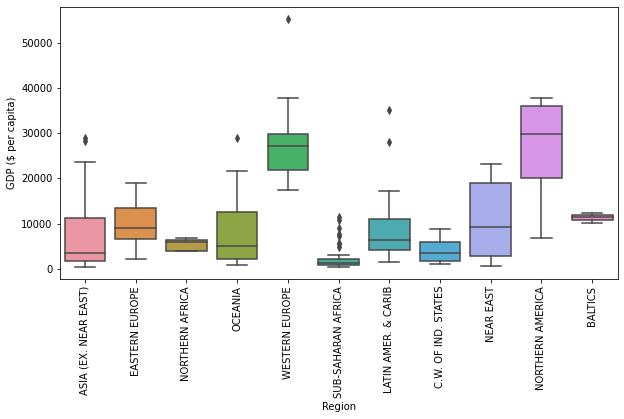

In [12]:
plt.rcParams["figure.figsize"] = (10,5)
sns.boxplot('Region', 
            'GDP ($ per capita)', 
            data=df)
pylab.xticks(rotation=90)

<AxesSubplot:>

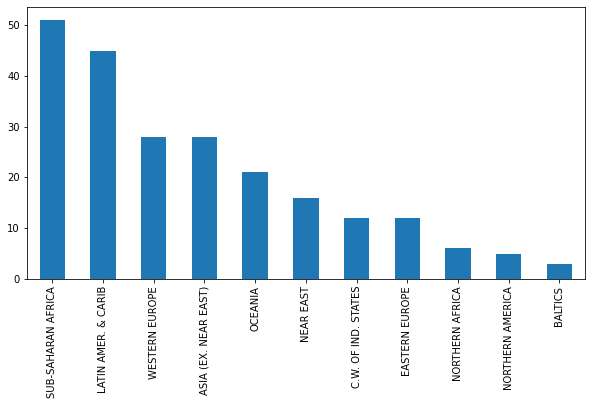

In [13]:
df.Region.value_counts().plot(kind='bar')

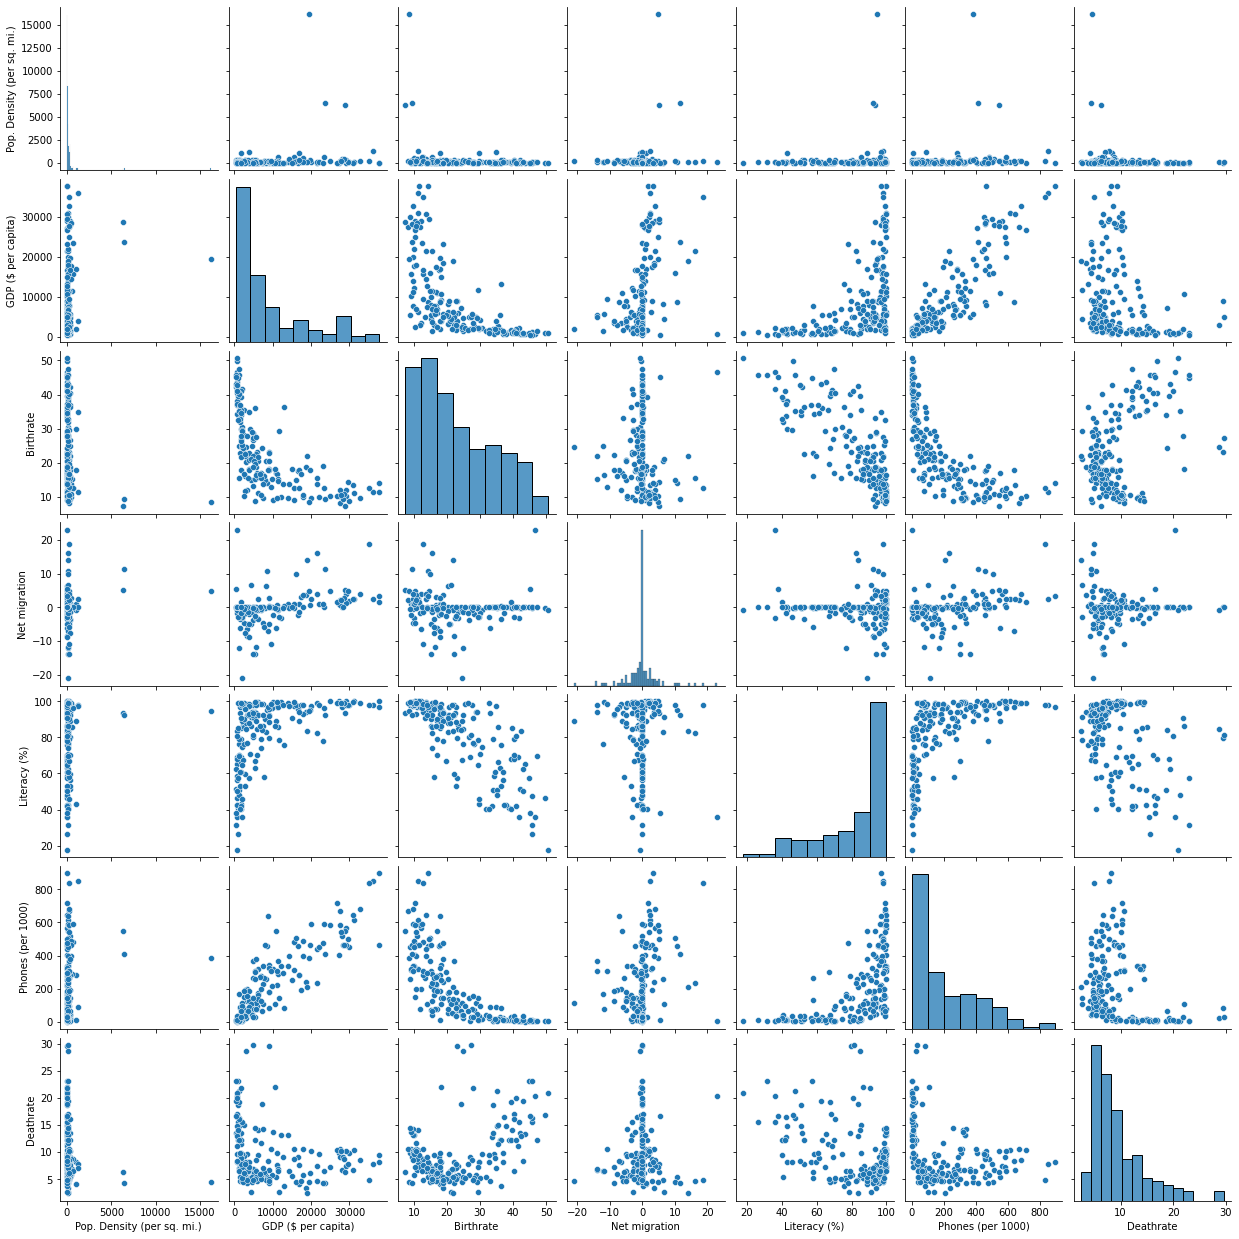

In [14]:
sns.pairplot(df.dropna()[['Pop. Density (per sq. mi.)', 
                          'GDP ($ per capita)', 
                          'Birthrate', 
                          'Net migration', 
                          'Literacy (%)', 
                          'Phones (per 1000)', 
                          'Deathrate']])

In [15]:
df['GDP ($ per capita)'].corr(df['Birthrate'])

-0.6501370279422616

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP ($ per capita)', ylabel='Birthrate'>

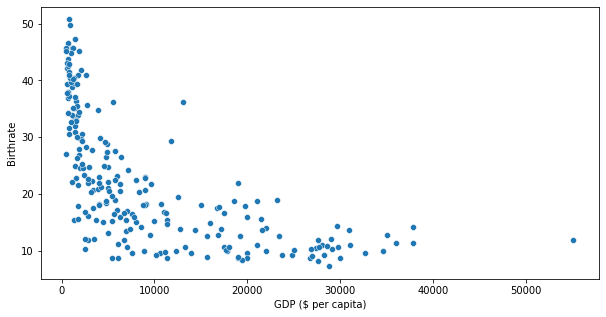

In [16]:
sns.scatterplot('GDP ($ per capita)', 
                'Birthrate', 
                data=df)

In [17]:
df['Phones (per 1000)'].corr(df['Birthrate'])

-0.7246144139500454

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Phones (per 1000)', ylabel='Birthrate'>

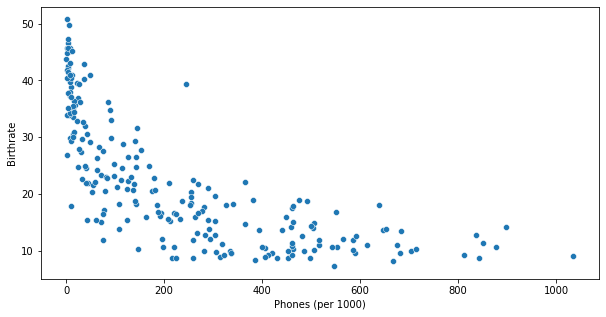

In [18]:
sns.scatterplot('Phones (per 1000)', 
                'Birthrate', 
                data=df)

### Na tomto predmete sa budeme zaoberať len supervised ML (učenia s učiteľom)
- Regresie  𝑌∈𝑅
- Klasifikácie  𝑌∈{𝐶1,𝐶2,…,𝐶𝑁}

**Snažíme sa nájsť funkciu $f$ atribútov $X$, ktorá bude predikovať hodnotu závislej premennej $Y$**

# Obese dataset

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

In [20]:
df = pd.read_csv("data/obese.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8316 entries, 0 to 8315
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Entity                             8316 non-null   object 
 1   Code                               7980 non-null   object 
 2   Year                               8316 non-null   int64  
 3   Share of adults who are obese (%)  8316 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 260.0+ KB


I don't like one column's name. It is too long, I'm going to shorten it

In [21]:
df.rename(columns={'Share of adults who are obese (%)' : 'obesity_rate'}, inplace=True)
df.Entity.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Americas',
       'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Eastern Mediterranean', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Europe', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'G

**Visualization**

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


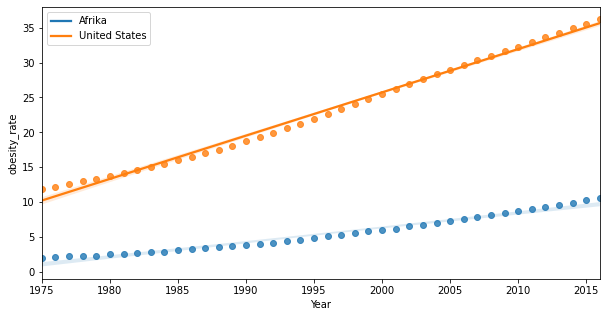

In [22]:
af = df[df.Entity == 'Africa']
sns.regplot(af.Year, af.obesity_rate)

usa = df[df.Entity == 'United States']
sns.regplot(usa.Year, usa.obesity_rate)

plt.legend(labels=['Afrika', 'United States'])

**Simple Y=f(X)**

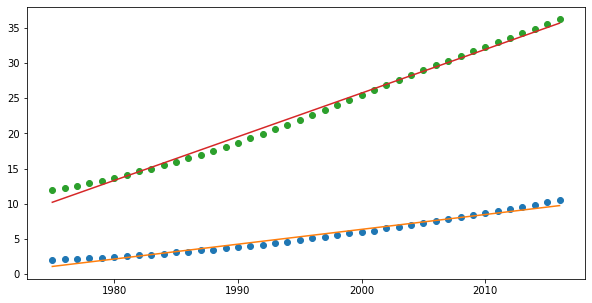

In [23]:
slope, intercept, r_value, p_value, std_err = stats.linregress(af.Year, af.obesity_rate)
line = slope * af.Year + intercept
plt.plot(af.Year, af.obesity_rate, 'o', af.Year, line)

slope, intercept, r_value, p_value, std_err = stats.linregress(usa.Year, usa.obesity_rate)
line = slope * usa.Year + intercept
plt.plot(usa.Year, usa.obesity_rate, 'o', usa.Year, line)

In [24]:
x = 2300
y = slope * x + intercept
y

211.89036274748128

# Diamond dataset

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

df = pd.read_csv('data/diamonds.csv')
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [26]:
df.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

<AxesSubplot:>

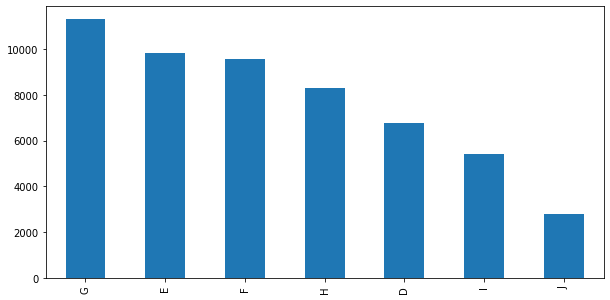

In [27]:
df.color.value_counts().plot(kind='bar')

<AxesSubplot:ylabel='color'>

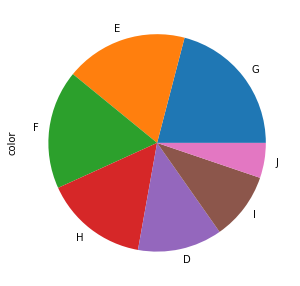

In [28]:
df.color.value_counts().plot(kind='pie')

**Your code:**

# Monitoring dataset

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

filename = 'data/monitoring.csv'
df = pd.read_csv(filename)
df.describe()

,1990-01-01\t16.000\t1\t18.000\t1\t21.000\t1\t26.000\t1\t21.000\t1\t19.000\t1\t19.000\t1\t16.000\t1\t15.000\t1\t13.000\t1\t12.000\t1\t16.000\t1\t-999.000\t0\t-999.000\t0\t19.000\t1\t26.000\t1\t23.000\t1\t23.000\t1\t28.000\t1\t41.000\t1\t32.000\t1\t21.000\t1\t23.000\t1\t25.000\t1
count,8396
unique,8396
top,2007-08-04\t27.000\t1\t30.000\t1\t19.000\t1\t1...
freq,1


In [30]:
%%bash
head -n 10 data/monitoring.csv

Couldn't find program: 'bash'


In [31]:
data = pd.read_csv(filename, 
                   sep='\t', 
                   header=None, 
                   na_values=[-999, -9999], 
                   index_col=0)
data.head()

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
0,,,,,,,,,,,,,,,,,,,,,
1990-01-01,16.0,1,18.0,1,21.0,1,26.0,1,21.0,1,...,41.0,1,32.0,1,21.0,1,23.0,1,25.0,1
1990-01-02,19.0,1,22.0,1,22.0,1,25.0,1,28.0,1,...,59.0,1,58.0,1,52.0,1,40.0,1,36.0,1
1990-01-03,39.0,1,33.0,1,23.0,1,12.0,1,15.0,1,...,47.0,1,47.0,1,41.0,1,38.0,1,37.0,1
1990-01-04,49.0,1,52.0,1,55.0,1,57.0,1,58.0,1,...,45.0,1,43.0,1,42.0,1,32.0,1,23.0,1
1990-01-05,20.0,1,23.0,1,38.0,1,55.0,1,61.0,1,...,46.0,1,34.0,1,22.0,1,21.0,1,29.0,1


**Your code:***